In [233]:
import pandas as pd
import numpy as np

data1 = pd.read_csv("dirty_iris.csv")
data1

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica


In [234]:
data1.Species.unique()

array(['versicolor', 'virginica', 'setosa'], dtype=object)

### 1 identifying missing value 

In [235]:
data1.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [236]:
data2 = data1[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species']]
data2.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

**data type of column seems to be valid in above**

In [237]:
data1.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor


**suspect found in head**

In [238]:
data1.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,140.000000,133.000000,131.000000,138.0
mean,6.559286,3.390977,4.449962,inf
std,6.800940,3.315310,5.769299,NaN
min,0.000000,-3.000000,0.000000,0.1
25%,5.100000,2.800000,1.600000,0.3
50%,5.750000,3.000000,4.500000,1.3
75%,6.400000,3.300000,5.100000,1.8
max,73.000000,30.000000,63.000000,inf


**suspect found in describe too\  
1)some inf value\
2)-3 and 0 found in min**

In [239]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  140 non-null    float64
 1   Sepal.Width   133 non-null    float64
 2   Petal.Length  131 non-null    float64
 3   Petal.Width   138 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**suspect found at total entries 150 while column have below 150**

In [240]:
# missing values may be of form ---> NaN’, ‘NA’, ‘?’, zero ‘0’, minus one ‘-1’ or a blank space “ ”

# Replace all the specified missing values with np.nan
missing_values = ['NaN', 'NA', '?', '0', '-1', '']
print(missing_values)

data1.replace(missing_values, np.nan, inplace=True)

# Count occurrences of np.nan in each column
missing_values_count = data1.isnull().sum()        # or data1.isna().sum() 
print(missing_values_count)


['NaN', 'NA', '?', '0', '-1', '']
Sepal.Length    10
Sepal.Width     17
Petal.Length    19
Petal.Width     12
Species          0
dtype: int64


**since all null value is already converted to nan which pandas recognize i.e null + entries = total entries**

### Resulting constraint Object

In [241]:
## Species constraint

rule1_Species=data1['Species'].apply(lambda x: True if x=='versicolor' or x=='virginica' or x=='setosa' else data1.drop())
rule1_Species
print(len(data1))
print("number of row that has other name than feature : ",len(data1)-len(rule1))

150
number of row that has other name than feature :  0


In [242]:
# Positive constraint

rule2neg =data1.iloc[:,:4]<0
rule2neg.sum()

print("number of row that has negative values : ",len(data1)-len(rule2))

number of row that has negative values :  0


In [243]:
data1.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,140.000000,133.000000,131.000000,138.0
mean,6.559286,3.390977,4.449962,inf
std,6.800940,3.315310,5.769299,NaN
min,0.000000,-3.000000,0.000000,0.1
25%,5.100000,2.800000,1.600000,0.3
50%,5.750000,3.000000,4.500000,1.3
75%,6.400000,3.300000,5.100000,1.8
max,73.000000,30.000000,63.000000,inf


In [244]:
#rule-3 petal length of iris is at least 2 times its petal width
rule3=data1['Petal.Length']>=2*data1['Petal.Width']
rule3=rule3.sum()
rule3

print("number of row that whose petal length is not at least 2 times its petal width : ",len(data1)-rule3)

number of row that whose petal length is not at least 2 times its petal width :  34


In [245]:
#rule-4 sepal length of an iris cannot exceed 30
rule4=data1['Sepal.Length'].apply(lambda x: True if x<=30  else False)
rule4=rule4.sum()
rule4

print("number of row that has other name than feature : ",len(data1)-rule4)

number of row that has other name than feature :  12


In [246]:
#rule-5 sepals of an iris are longer than its petals
rule5=(data1['Sepal.Length']>data1['Petal.Length']) & ( data1['Sepal.Width'] > data1['Petal.Width'])
rule5=rule5.sum()
rule5

print("number of row those sepals  are not  longer than its petals : ",len(data1)-rule5)

number of row those sepals  are not  longer than its petals :  58


## 2 Handling missing values
**1 drop--> disadv lose info\
  2.statiscs method-->fill with mean , median , mode**

### 1. drop

In [247]:
data1

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica


In [248]:
data1.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,140.000000,133.000000,131.000000,138.0
mean,6.559286,3.390977,4.449962,inf
std,6.800940,3.315310,5.769299,NaN
min,0.000000,-3.000000,0.000000,0.1
25%,5.100000,2.800000,1.600000,0.3
50%,5.750000,3.000000,4.500000,1.3
75%,6.400000,3.300000,5.100000,1.8
max,73.000000,30.000000,63.000000,inf


**since it contain inf value so replace inf with NaN**

In [249]:
data3 = data1.replace([np.inf, -np.inf, -3], np.nan )

data3 = data3.dropna(how='any')
data3

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
7,5.9,3.0,5.1,1.8,virginica
...,...,...,...,...,...
143,6.3,2.9,5.6,1.8,virginica
144,5.7,2.5,5.0,2.0,virginica
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor


**drop all row having any NaN value and\
need to drop having length negative**

In [250]:
data3.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
7,5.9,3.0,5.1,1.8,virginica


In [251]:
data3.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
143,6.3,2.9,5.6,1.8,virginica
144,5.7,2.5,5.0,2.0,virginica
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa


In [252]:
data3.info()  #satisfied

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 147
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  94 non-null     float64
 1   Sepal.Width   94 non-null     float64
 2   Petal.Length  94 non-null     float64
 3   Petal.Width   94 non-null     float64
 4   Species       94 non-null     object 
dtypes: float64(4), object(1)
memory usage: 4.4+ KB


**since it contain inf value in some row which lead min to infinity**

In [253]:
data3.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,94.000000,94.000000,94.000000,94.000000
mean,6.346809,3.304255,4.087234,1.200000
std,4.526949,2.828918,2.888957,0.770142
min,4.300000,0.000000,0.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.450000,1.400000
75%,6.500000,3.300000,5.175000,1.875000
max,49.000000,30.000000,23.000000,2.500000


### 2. Statistics

In [254]:
data1

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica


In [255]:
data1.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,140.000000,133.000000,131.000000,138.0
mean,6.559286,3.390977,4.449962,inf
std,6.800940,3.315310,5.769299,NaN
min,0.000000,-3.000000,0.000000,0.1
25%,5.100000,2.800000,1.600000,0.3
50%,5.750000,3.000000,4.500000,1.3
75%,6.400000,3.300000,5.100000,1.8
max,73.000000,30.000000,63.000000,inf


In [256]:
# data4 = data1.unique()

In [257]:
data4 = data1.replace([np.inf, -np.inf, -3], np.nan )
data4

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica


In [258]:
data4.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,140.000000,132.000000,131.000000,137.000000
mean,6.559286,3.439394,4.449962,1.207299
std,6.800940,3.280401,5.769299,0.764722
min,0.000000,0.000000,0.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.750000,3.000000,4.500000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,73.000000,30.000000,63.000000,2.500000


In [259]:
s_lm = data4['Sepal.Length'].median()
data4['Sepal.Length'].fillna(value= s_lm , inplace =True)

s_wm = data4['Sepal.Width'].median()
data4['Sepal.Width'].fillna(value = s_wm , inplace =True)

p_lm = data4['Petal.Length'].median()
data4['Petal.Length'].fillna(value = s_wm , inplace =True)

p_wm = data4['Petal.Width'].median()
data4['Petal.Width'].fillna(value = s_wm , inplace =True)

In [260]:
data4

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,3.0,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,3.0,1.8,virginica


In [261]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [262]:
data4.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,6.505333,3.386667,4.266300,1.362667
std,6.571880,3.079215,5.410598,0.888747
min,0.000000,0.000000,0.000000,0.100000
25%,5.100000,2.800000,1.700000,0.400000
50%,5.750000,3.000000,4.100000,1.400000
75%,6.400000,3.275000,5.100000,2.000000
max,73.000000,30.000000,63.000000,3.000000


## Outliers and Visulz.

In [266]:
data4.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,147.000000,147.000000,147.000000,147.000000
mean,5.808163,3.034014,3.820714,1.353741
std,0.803013,0.453373,2.310685,0.882344
min,4.300000,0.000000,0.000000,0.100000
25%,5.100000,2.800000,1.700000,0.350000
50%,5.750000,3.000000,4.100000,1.400000
75%,6.350000,3.200000,5.100000,2.000000
max,7.900000,4.200000,23.000000,3.000000


In [267]:
q1 = data4['Sepal.Length'].quantile(0.25)
q3 = data4['Sepal.Length'].quantile(0.75)
iqr = q3 -q1
print(q1)
print(q3)

outcond1 = ( data4['Sepal.Length'] < q1 - 1.5*iqr ) | ( data4['Sepal.Length'] >  q3 + 1.5*iqr )
print(data4[outcond1])

data4= data4[~outcond1] #removed outlier

5.1
6.35
Empty DataFrame
Columns: [Sepal.Length, Sepal.Width, Petal.Length, Petal.Width, Species]
Index: []


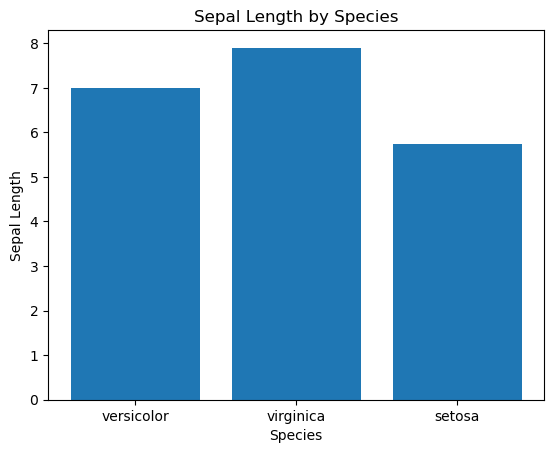

In [268]:
plt.bar(x=data4['Species'], height=data4['Sepal.Length'])
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.title('Sepal Length by Species')
plt.show()

In [227]:
data4['Sepal.Length'].describe()

count    147.000000
mean       5.808163
std        0.803013
min        4.300000
25%        5.100000
50%        5.750000
75%        6.350000
max        7.900000
Name: Sepal.Length, dtype: float64

### Sepal Width

In [269]:
q1 = data4['Sepal.Width'].quantile(0.25)
q3 = data4['Sepal.Width'].quantile(0.75)
iqr = q3 -q1
print(q1)
print(q3)

outcond2 = ( data4['Sepal.Width'] < q1 - 1.5*iqr ) | ( data4['Sepal.Width'] >  q3 + 1.5*iqr )
print(data4[outcond2])

data4= data4[~outcond2]

2.8
3.2
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
14           5.75          3.9           1.7          0.4  setosa
18           5.75          4.0           3.0          0.2  setosa
44           5.50          4.2           1.4          0.2  setosa
123          5.20          4.1           1.5          0.1  setosa
129          5.70          0.0           1.7          0.3  setosa


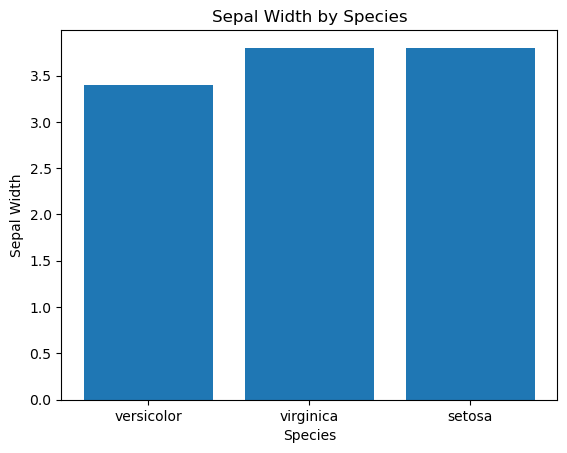

In [270]:
plt.bar(x=data4['Species'], height=data4['Sepal.Width'])
plt.xlabel('Species')
plt.ylabel('Sepal Width')
plt.title('Sepal Width by Species')
plt.show()

### Petal length

In [275]:
q1 = data4['Petal.Length'].quantile(0.25)
q3 = data4['Petal.Length'].quantile(0.75)
iqr = q3 -q1
print(q1)
print(q3)

outcond3 = ( data4['Petal.Length'] < q1 - 1.5*iqr ) | ( data4['Petal.Length'] >  q3 + 1.5*iqr )
data4[outcond3]

data4= data4[~outcond3]

1.9
5.1


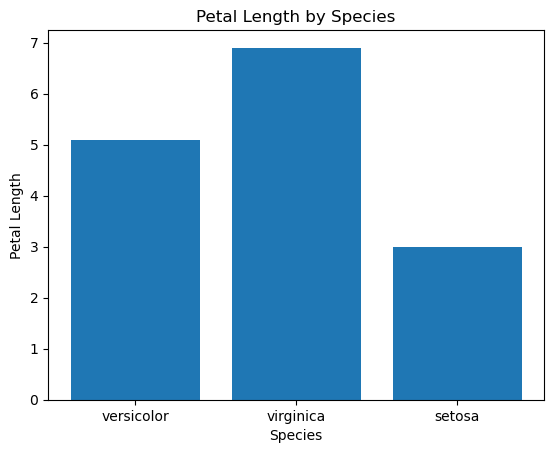

In [276]:
plt.bar(x=data4['Species'], height=data4['Petal.Length'])
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.title('Petal Length by Species')
plt.show()

In [277]:
data4['Petal.Length'].describe()

count    141.000000
mean       3.754220
std        1.669368
min        0.000000
25%        1.900000
50%        4.200000
75%        5.100000
max        6.900000
Name: Petal.Length, dtype: float64

### petal width

In [284]:
q1 = data4['Petal.Width'].quantile(0.25)
q3 = data4['Petal.Width'].quantile(0.75)
iqr = q3 -q1
print(q1)
print(q3)

outcond4 = ( data4['Petal.Width'] < q1 - 1.5*iqr ) | ( data4['Petal.Width'] >  q3 + 1.5*iqr )
print(data4[outcond4])

data4 = data4[~outcond4]

0.4
2.0
Empty DataFrame
Columns: [Sepal.Length, Sepal.Width, Petal.Length, Petal.Width, Species]
Index: []


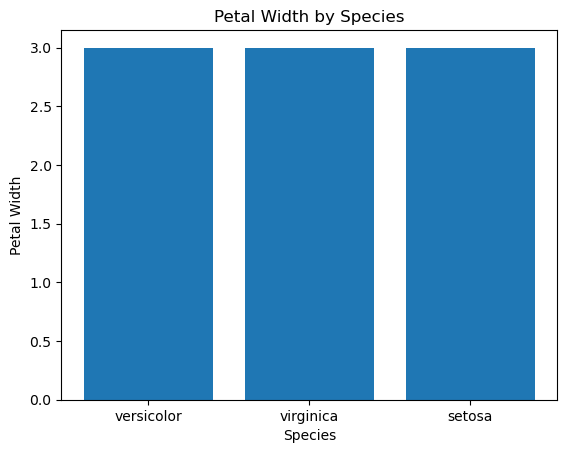

In [285]:
plt.bar(x=data4['Species'], height=data4['Petal.Width'])
plt.xlabel('Species')
plt.ylabel('Petal Width')
plt.title('Petal Width by Species')
plt.show()

In [286]:
data4['Petal.Width'].describe()

count    141.000000
mean       1.393617
std        0.874987
min        0.100000
25%        0.400000
50%        1.400000
75%        2.000000
max        3.000000
Name: Petal.Width, dtype: float64

In [293]:
data4

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,3.0,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,3.0,1.8,virginica


In [294]:
data4.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,141.000000,141.000000,141.000000,141.000000
mean,5.810638,3.027660,3.754220,1.393617
std,0.815186,0.344364,1.669368,0.874987
min,4.300000,2.200000,0.000000,0.100000
25%,5.100000,2.800000,1.900000,0.400000
50%,5.750000,3.000000,4.200000,1.400000
75%,6.400000,3.200000,5.100000,2.000000
max,7.900000,3.800000,6.900000,3.000000


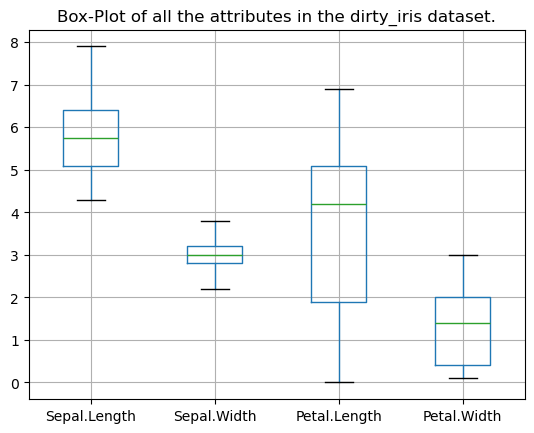

In [287]:
import matplotlib.pyplot as plt

iris_boxplot=data4.boxplot()
plt.title('Box-Plot of all the attributes in the dirty_iris dataset.')
iris_boxplot.plot()
plt.show()